In [86]:
#importing required libraries for mongodb connection, api request,json data
from pymongo import MongoClient
from pprint import pprint
import json
from urllib.request import Request, urlopen
#Function to establish mongodb connection
def mongodb_connection():
    collection_name="stock_data"
    try:
        client = MongoClient(#connection string")
        db = client['project']
        collectionList = db.list_collection_names()
        if(collection_name in collectionList):
            db.stock_data.drop()
            print('duplicate collection removed')

        collection = db['stock_data'
        stock_data=db.stock_data
        print("stock_data collection created")
    except pymongo.errors.ConnectionFailure as e:
        print("connection failed "+ e)

#Function call
mongodb_connection()
      

duplicate collection removed
stock_data collection created


In [87]:
#Fetching data from api and inserting to mongodb
def api_to_mongodb(app_id,ticker_list):
 
    count=1
    stock_data.delete_many({})
    for i in ticker_list:
        try:
            base_url = "https://api.polygon.io/v2/aggs/ticker/{}/range/1/day/2020-01-01/2021-12-20?adjusted=true&sort=asc&apiKey={}"
            stock_url = base_url.format(i,app_id)
            count=count+1
            req = Request(stock_url)
            data = urlopen(req).read()
            parsed_json=json.loads(data)
            data=parsed_json
        except urllib.error.URLError:
            print("The URL could not be opened")
        except json.decoder.JSONDecodeError:
            print("There was a problem loading json data")       
        data['results']
        l=len(data['results'])
        #Appending symbol key pair to json data
        for j in range (0,l):
            data['results'][j]["symbol"]=i

        if isinstance(data['results'], list):
            result=stock_data.insert_many(data['results'])
            print("{} ticker's  data inserted".format(i))
        else:
            result=stock_data.insert_one(data['results'])
            print("{} ticker's data inserted".format(i))

#initializing function parameters and function call
###app_id = ""
ticker_list=['AAPL','F','AMZN','SKYW','ALGT']
api_to_mongodb(app_id,ticker_list)

AAPL ticker's  data inserted
F ticker's  data inserted
AMZN ticker's  data inserted
SKYW ticker's  data inserted
ALGT ticker's  data inserted


In [88]:
db.list_collection_names()
#stock_data

#import pprint
#pprint.pprint(stock_data.find_one())



#stock_data.delete_many({})

['stock_data']

In [89]:
#Fetching data from mongodb and convering to dataframe
import pandas as pd
stockdata = stock_data.find()               #Fetching data from mongodb - find() work as * in sql
df = pd.DataFrame(list(stockdata))          #converting to dataframe
df.head()
#converting column t to correct date format and storing it in date column
df['date']=pd.to_datetime(df['t'],unit='ms')
#to remove timestamp
df['date']=df['date'].dt.date.astype(str)
df['date'] = pd.to_datetime(df['date'])
#df.set_index('date',inplace=True)

#dropping unwanted columns 't' and _id
df.drop(columns=['t','_id'],inplace=True)
df.rename(columns={'v':'volume','vw':'vol_wghted_avg_price','o':'open','c':'close','h':'highest_price','l':'lowest_price','n':'num_trans'},inplace=True)

print(df)

           volume  vol_wghted_avg_price      open     close  highest_price  \
0     135647456.0               74.6099   74.0600   75.0875         75.150   
1     146535512.0               74.7026   74.2875   74.3575         75.145   
2     118518576.0               74.4499   73.4475   74.9500         74.990   
3     111510620.0               74.7311   74.9600   74.5975         75.225   
4     132363784.0               75.2914   74.2900   75.7975         76.110   
...           ...                   ...       ...       ...            ...   
2480     231070.0              178.2176  179.2800  177.4000        183.630   
2481     303029.0              176.8738  177.7000  178.7200        178.880   
2482     230273.0              174.5396  179.7500  172.1900        180.240   
2483     528911.0              176.6543  173.6600  176.7200        180.330   
2484     230936.0              175.3596  172.9000  176.7700        177.765   

      lowest_price  num_trans symbol       date  
0          73

In [90]:
# checking for any na values
df.isna().sum()
#no na values found

volume                  0
vol_wghted_avg_price    0
open                    0
close                   0
highest_price           0
lowest_price            0
num_trans               0
symbol                  0
date                    0
dtype: int64

In [91]:
#Creating a new column Total_traded which is calculated as the product of 'open' and 'volume' columns
df.dtypes
df['Total_traded']=df['volume']*df['open']
#Final data frame after data transformation and cleaning
df

,volume,vol_wghted_avg_price,open,close,highest_price,lowest_price,num_trans,symbol,date,Total_traded
0,135647456.0,74.6099,74.0600,75.0875,75.150,73.7975,283480,AAPL,2020-01-02,1.004605e+10
1,146535512.0,74.7026,74.2875,74.3575,75.145,74.1250,280940,AAPL,2020-01-03,1.088576e+10
2,118518576.0,74.4499,73.4475,74.9500,74.990,73.1875,242860,AAPL,2020-01-06,8.704893e+09
3,111510620.0,74.7311,74.9600,74.5975,75.225,74.3700,227868,AAPL,2020-01-07,8.358836e+09
4,132363784.0,75.2914,74.2900,75.7975,76.110,74.2890,261770,AAPL,2020-01-08,9.833306e+09
...,...,...,...,...,...,...,...,...,...,...
2480,231070.0,178.2176,179.2800,177.4000,183.630,175.7550,5395,ALGT,2021-12-14,4.142623e+07
2481,303029.0,176.8738,177.7000,178.7200,178.880,170.8400,6652,ALGT,2021-12-15,5.384825e+07
2482,230273.0,174.5396,179.7500,172.1900,180.240,171.2150,7142,ALGT,2021-12-16,4.139157e+07
2483,528911.0,176.6543,173.6600,176.7200,180.330,171.2400,6400,ALGT,2021-12-17,9.185068e+07


In [92]:
#importing required packages to connect to mysql cloud instance
from sqlalchemy import create_engine
from sqlalchemy import text
import mysql.connector
from mysql.connector import errorcode
import MySQLdb
#Database connection and data insertion to stock_data table
def upload_to_mysql(df_sql):
    try:
        my_conn = create_engine(#connection string) #mysql connection string

        sqltext = "DROP TABLE IF EXISTS {}".format('stock_data')
        sql = text(sqltext)
        my_conn.execute(sql)
        df_sql.to_sql(con=my_conn, name='stock_data', if_exists='replace',index = False)
        print("data uploaded successfully")
    except OperationalError:
        print("Unable to connect to msql instance")
    except Exception as e:
        print(e)
#Function call
upload_to_mysql(df)

data uploaded successfully


In [93]:
#establishing connection to cloud instance and reading data from mysql table and storing it in dataframe for visualisations
my_conn = create_engine(#connection string)
df_sql = pd.read_sql('SELECT * FROM stock_data', con=my_conn)

In [94]:

#setting date column as index
df_sql.set_index('date',inplace=True)
df_sql


,volume,vol_wghted_avg_price,open,close,highest_price,lowest_price,num_trans,symbol,Total_traded
date,,,,,,,,,
2020-01-02,135647456.0,74.6099,74.0600,75.0875,75.150,73.7975,283480,AAPL,1.004605e+10
2020-01-03,146535512.0,74.7026,74.2875,74.3575,75.145,74.1250,280940,AAPL,1.088576e+10
2020-01-06,118518576.0,74.4499,73.4475,74.9500,74.990,73.1875,242860,AAPL,8.704893e+09
2020-01-07,111510620.0,74.7311,74.9600,74.5975,75.225,74.3700,227868,AAPL,8.358836e+09
2020-01-08,132363784.0,75.2914,74.2900,75.7975,76.110,74.2890,261770,AAPL,9.833306e+09
...,...,...,...,...,...,...,...,...,...
2021-12-14,231070.0,178.2176,179.2800,177.4000,183.630,175.7550,5395,ALGT,4.142623e+07
2021-12-15,303029.0,176.8738,177.7000,178.7200,178.880,170.8400,6652,ALGT,5.384825e+07
2021-12-16,230273.0,174.5396,179.7500,172.1900,180.240,171.2150,7142,ALGT,4.139157e+07


In [95]:
#importing matplotlib.pyplot for visualizations
import matplotlib.pyplot as plt
#Splitted dataframe based on symbol for visualization
apple=df_sql.loc[df_sql["symbol"]=='AAPL']
amazon=df_sql.loc[df_sql["symbol"]=='AMZN']
ford=df_sql.loc[df_sql["symbol"]=='F']
skywest=df_sql.loc[df_sql["symbol"]=='SKYW']
allegiant=df_sql.loc[df_sql["symbol"]=='ALGT']
apple

,volume,vol_wghted_avg_price,open,close,highest_price,lowest_price,num_trans,symbol,Total_traded
date,,,,,,,,,
2020-01-02,135647456.0,74.6099,74.0600,75.0875,75.150,73.7975,283480,AAPL,1.004605e+10
2020-01-03,146535512.0,74.7026,74.2875,74.3575,75.145,74.1250,280940,AAPL,1.088576e+10
2020-01-06,118518576.0,74.4499,73.4475,74.9500,74.990,73.1875,242860,AAPL,8.704893e+09
2020-01-07,111510620.0,74.7311,74.9600,74.5975,75.225,74.3700,227868,AAPL,8.358836e+09
2020-01-08,132363784.0,75.2914,74.2900,75.7975,76.110,74.2890,261770,AAPL,9.833306e+09
...,...,...,...,...,...,...,...,...,...
2021-12-14,139356181.0,174.4001,175.2500,174.3300,177.740,172.2100,985603,AAPL,2.442217e+10
2021-12-15,131063257.0,176.0771,175.1100,179.3000,179.500,172.3108,937053,AAPL,2.295049e+10
2021-12-16,150185842.0,174.4138,179.2800,172.2600,181.140,170.7500,1202731,AAPL,2.692532e+10


In [96]:
#pip install pymysql

In [97]:
#pip install mysql-connector-python

In [98]:
#Fetching data from mysql at aggregated level for visualization
my_conn = create_engine(#connection string)
df_apple = pd.read_sql('''select monthname(date) as month,max(highest_price) as highest_price,min(lowest_price) as lowest_price,symbol from stock_data
                  where year(date)=2021 and symbol='AAPL' group by symbol,month(date),monthname(date) order by month(date)''', con=my_conn)

df_amazon = pd.read_sql('''select monthname(date) as month,max(highest_price) as highest_price,min(lowest_price) as lowest_price,symbol from stock_data
                  where year(date)=2021 and symbol='AMZN' group by symbol,month(date),monthname(date) order by month(date)''', con=my_conn)

df_ford = pd.read_sql('''select monthname(date) as month,max(highest_price) as highest_price,min(lowest_price) as lowest_price,symbol from stock_data
                  where year(date)=2021 and symbol='F' group by symbol,month(date),monthname(date) order by month(date)''', con=my_conn)

df_skyw = pd.read_sql('''select monthname(date) as month,max(highest_price) as highest_price,min(lowest_price) as lowest_price,symbol from stock_data
                  where year(date)=2021 and symbol='SKYW' group by symbol,month(date),monthname(date) order by month(date)''', con=my_conn)

df_algt = pd.read_sql('''select monthname(date) as month,max(highest_price) as highest_price,min(lowest_price) as lowest_price,symbol from stock_data
                  where year(date)=2021 and symbol='ALGT' group by symbol,month(date),monthname(date) order by month(date)''', con=my_conn)

In [99]:
#set month as index for aggregated dataframes
df_apple.set_index('month',inplace=True)
df_amazon.set_index('month',inplace=True)
df_ford.set_index('month',inplace=True)
df_skyw.set_index('month',inplace=True)
df_algt.set_index('month',inplace=True)
df_apple
df_amazon

,highest_price,lowest_price,symbol
month,,,
January,3363.8900,3086.0000,AMZN
February,3434.0000,3036.7000,AMZN
March,3182.0000,2881.0001,AMZN
April,3554.0000,3115.5500,AMZN
May,3486.6450,3127.3700,AMZN
June,3524.8599,3172.2000,AMZN
July,3773.0782,3306.9800,AMZN
August,3472.5800,3175.7600,AMZN
September,3549.9900,3273.9900,AMZN


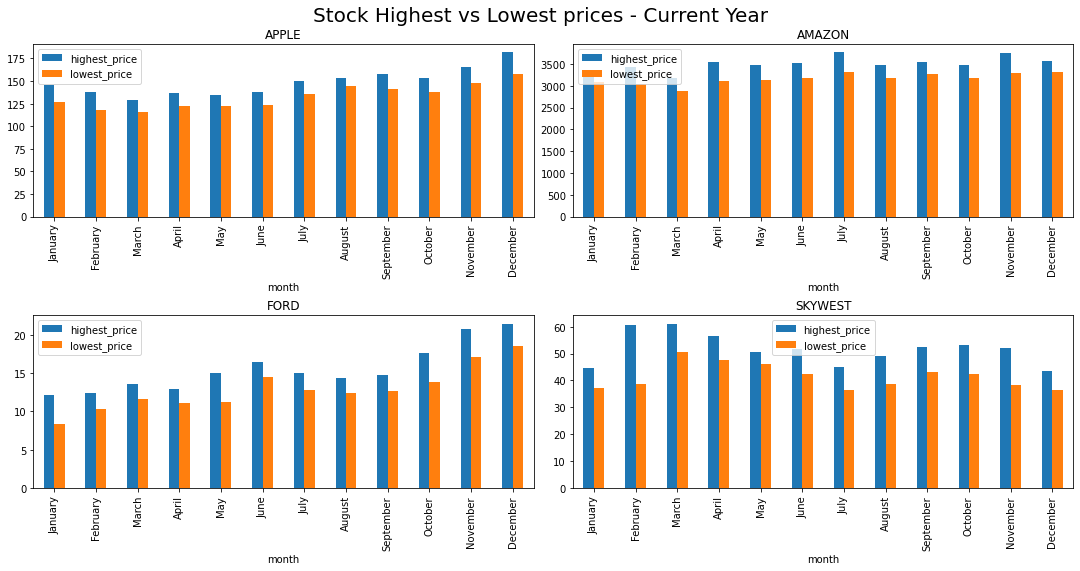

In [100]:
#Visualization 1: Analysing the highest and lowest price of various companies for the current year

import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))
plt.title('Periodwise Stock Highest Lowest prices - Current Year')
df_apple.plot.bar(ax=axes[0,0],title="APPLE")
df_amazon.plot.bar(ax=axes[0,1],title="AMAZON")
df_ford.plot.bar(ax=axes[1,0],title="FORD")
df_skyw.plot.bar(ax=axes[1,1],title="SKYWEST")
plt.suptitle('Stock Highest vs Lowest prices - Current Year',fontsize=20)

fig.tight_layout(pad=0.7)
plt.show()

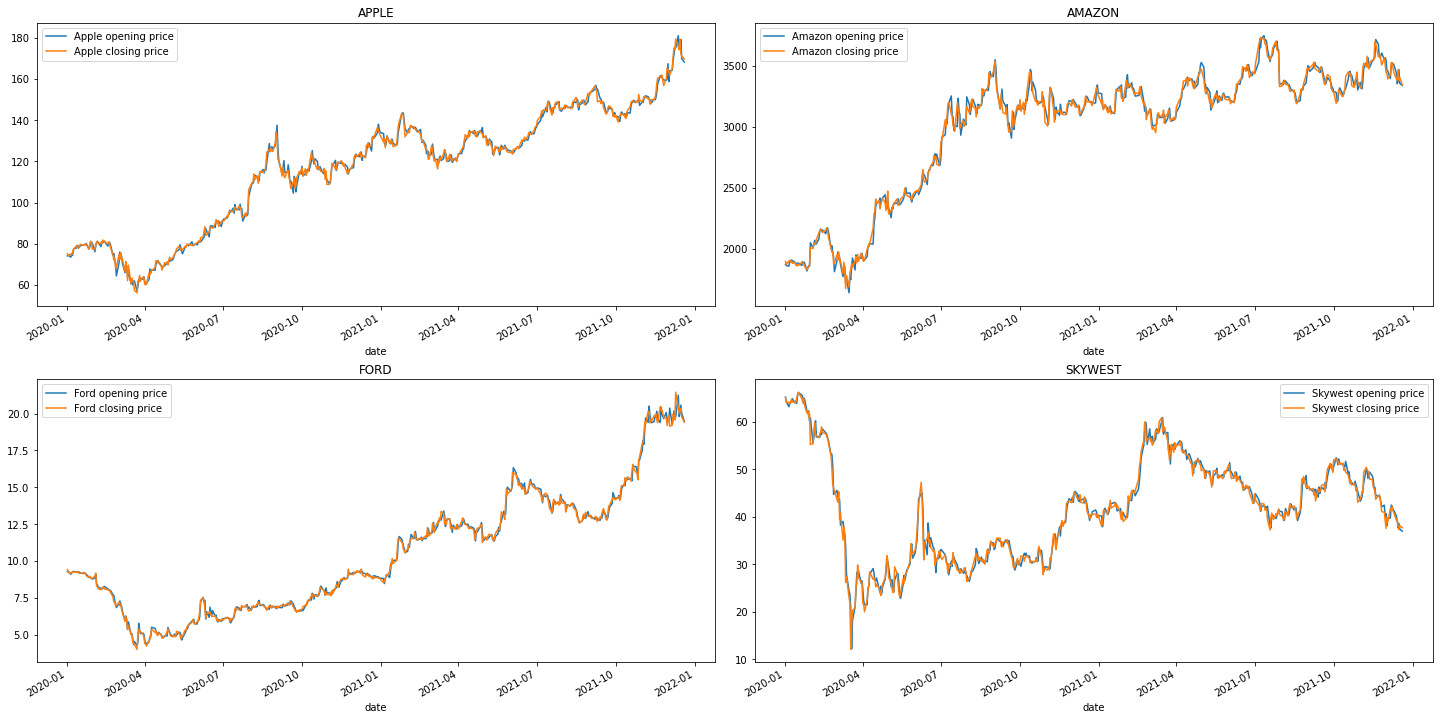

In [101]:
#Visualization 2 : Analysing stock market trend of companies
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(15,8))
apple['open'].plot(label="Apple opening price",figsize=(20,10),ax=axes[0,0],title="APPLE",legend="open")
apple['close'].plot(label="Apple closing price",ax=axes[0,0],title="APPLE",legend="open")
amazon['open'].plot(label="Amazon opening price",ax=axes[0,1],title="AMAZON",legend="open")
amazon['close'].plot(label="Amazon closing price",ax=axes[0,1],title="AMAZON",legend="close")
ford['open'].plot(label="Ford opening price",ax=axes[1,0],title="FORD",legend="open")
ford['close'].plot(label="Ford closing price",ax=axes[1,0],title="FORD",legend="close")
skywest['open'].plot(label="Skywest opening price",ax=axes[1,1],title="SKYWEST",legend="open")
skywest['close'].plot(label="Skywest closing price",ax=axes[1,1],title="SKYWEST",legend="open")
plt.legend()
fig.tight_layout(pad=0.7)
plt.show()


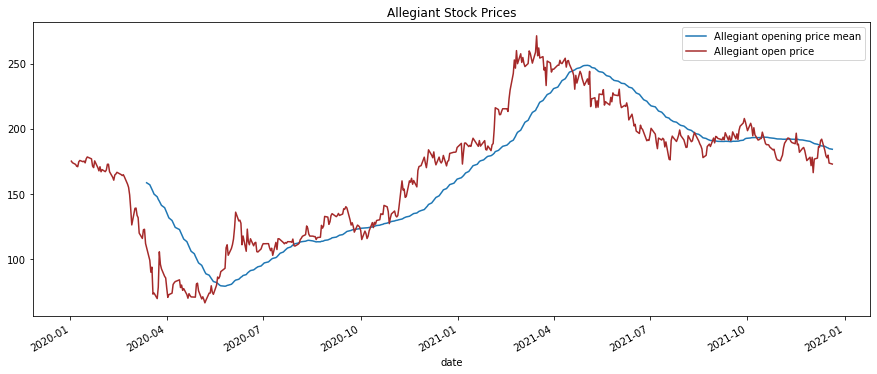

In [214]:
#visualisation :3
#Plotting open price along with rolling 50 mean for allegiant company

allegiant['open'].rolling(50).mean().plot(label="Allegiant opening price mean",figsize=(15,6))
allegiant['open'].plot(label="Allegiant open price",color="brown")
plt.legend()
plt.title('Allegiant Stock Prices')
plt.show()

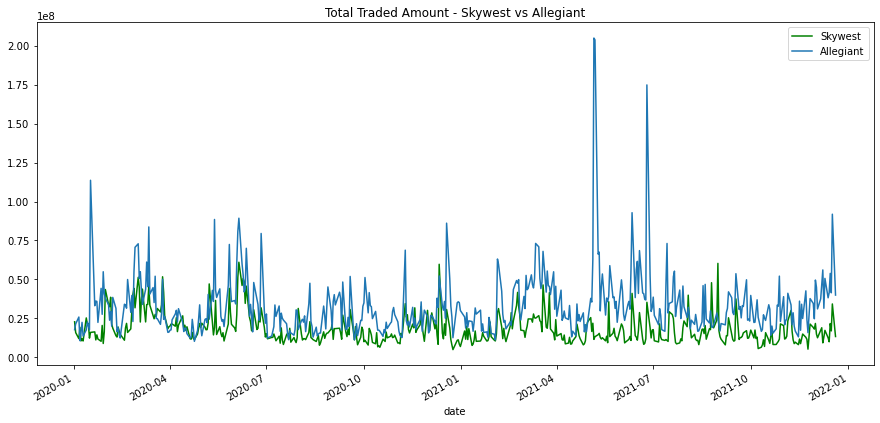

In [103]:
#Visualization 4 :Comparing Total traded amount of similar airline companies
skywest['Total_traded'].plot(label="Skywest",figsize=(15,7),color="green")
allegiant['Total_traded'].plot(label="Allegiant",figsize=(15,7))
plt.title('Total Traded Amount - Skywest vs Allegiant')
plt.legend()

In [104]:
allegiant.iloc[allegiant['Total_traded'].argmax()]

volume                      944358.0
vol_wghted_avg_price        219.1705
open                          216.99
close                          221.0
highest_price                  221.0
lowest_price                  216.41
num_trans                      16140
symbol                          ALGT
Total_traded            204916242.42
Name: 2021-05-06 00:00:00, dtype: object

In [105]:
#created new dataframe without index for scatter_matrix visualisation
from pandas.plotting import scatter_matrix
import pandas as pd
df[df.index.duplicated()]
df_comp=df_sql.reset_index() 
apple_comp=apple.reset_index() 
amazon_comp=amazon.reset_index() 
ford_comp=ford.reset_index()
skywest_comp=skywest.reset_index()
allegiant_comp=allegiant.reset_index()

array([[<AxesSubplot:xlabel='apple_open', ylabel='apple_open'>,
        <AxesSubplot:xlabel='ford_open', ylabel='apple_open'>,
        <AxesSubplot:xlabel='amazon_open', ylabel='apple_open'>,
        <AxesSubplot:xlabel='skywest_open', ylabel='apple_open'>,
        <AxesSubplot:xlabel='suncountry_open', ylabel='apple_open'>],
       [<AxesSubplot:xlabel='apple_open', ylabel='ford_open'>,
        <AxesSubplot:xlabel='ford_open', ylabel='ford_open'>,
        <AxesSubplot:xlabel='amazon_open', ylabel='ford_open'>,
        <AxesSubplot:xlabel='skywest_open', ylabel='ford_open'>,
        <AxesSubplot:xlabel='suncountry_open', ylabel='ford_open'>],
       [<AxesSubplot:xlabel='apple_open', ylabel='amazon_open'>,
        <AxesSubplot:xlabel='ford_open', ylabel='amazon_open'>,
        <AxesSubplot:xlabel='amazon_open', ylabel='amazon_open'>,
        <AxesSubplot:xlabel='skywest_open', ylabel='amazon_open'>,
        <AxesSubplot:xlabel='suncountry_open', ylabel='amazon_open'>],
       [<AxesSub

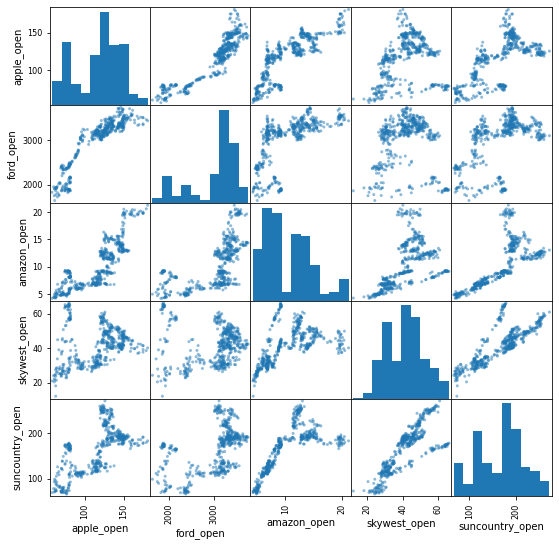

In [106]:
#visualization : 4
#scatter matrix visualisation
car_comp=pd.concat([apple_comp['open'],amazon_comp['open'],ford_comp['open'],skywest_comp['open'],allegiant_comp['open']],axis=1)
car_comp.columns=['apple_open','ford_open','amazon_open','skywest_open','suncountry_open']
scatter_matrix(car_comp,figsize=(9,9))

In [112]:
my_conn = create_engine("#connection string")
df_stock = pd.read_sql('''select * from stock_data''', con=my_conn)
df_coviddaily=pd.read_sql('''select * from dailydata order by date''', con=my_conn)

df_vaccine=pd.read_sql('''select * from vaccine_data''', con=my_conn)
df_countydata=pd.read_sql('''select * from County_data''', con=my_conn)


In [147]:
my_conn = create_engine(#connection string")
df_combined=pd.read_sql('''select sum(new_case) as cases_count,sum(new_death) as death_count,b.* from dailydata a inner join
stock_data b on a.date = b.date group by a.date,b.symbol order by a.date''', con=my_conn)

In [148]:
df_combined.head(100)
df_combined.set_index('date',inplace=True)
df_combined


,cases_count,death_count,volume,vol_wghted_avg_price,open,close,highest_price,lowest_price,num_trans,symbol,Total_traded
date,,,,,,,,,,,
2020-01-22,0.0,0.0,101832460.0,79.6217,79.645,79.425,79.9975,79.3275,208306,AAPL,8.110446e+09
2020-01-22,0.0,0.0,210493.0,171.1734,171.370,170.550,173.7000,170.5000,2767,ALGT,3.607219e+07
2020-01-22,0.0,0.0,3210157.0,1892.1043,1896.090,1887.460,1902.5000,1883.3400,83692,AMZN,6.086747e+09
2020-01-22,0.0,0.0,40321242.0,9.1881,9.220,9.160,9.2500,9.1500,69347,F,3.717619e+08
2020-01-22,0.0,0.0,171323.0,64.3989,65.070,64.140,65.5650,64.1300,2659,SKYW,1.114799e+07
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-20,291671.0,1328.0,107499114.0,169.2626,168.280,169.750,170.5800,167.4600,816118,AAPL,1.808995e+10
2021-12-20,291671.0,1328.0,230936.0,175.3596,172.900,176.770,177.7650,170.0000,7006,ALGT,3.992883e+07
2021-12-20,291671.0,1328.0,2868633.0,3335.4213,3337.000,3341.580,3357.4851,3312.0000,193163,AMZN,9.572628e+09


In [150]:
#Splitted dataframe based on symbol for visualization combining covid and stock trend
apple_combined=df_combined.loc[df_combined["symbol"]=='AAPL']
amazon_combined=df_combined.loc[df_combined["symbol"]=='AMZN']
ford_combined=df_combined.loc[df_combined["symbol"]=='F']
skywest_combined=df_combined.loc[df_combined["symbol"]=='SKYW']
allegiant_combined=df_combined.loc[df_combined["symbol"]=='ALGT']

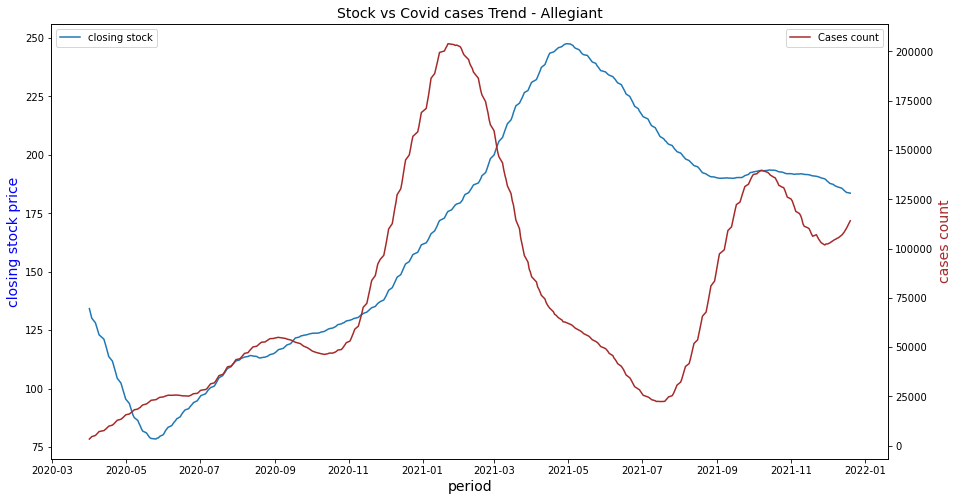

In [221]:
#combined visualization - Stock vs Covid cases Trend - Allegiant
fig,ax = plt.subplots(figsize=(15,8))
ax.set_title('Stock vs Covid cases Trend - Allegiant',fontsize=14)
ax.plot(allegiant_combined['close'].rolling(50).mean(),label="closing stock")
ax.set_xlabel("period",fontsize=14)
ax.set_ylabel("closing stock price",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(allegiant_combined['cases_count'].rolling(50).mean(),color="brown",label="Cases count")
ax2.set_ylabel("cases count",color="brown",fontsize=14)
ax.legend(loc='upper left')
ax2.legend()

plt.show()



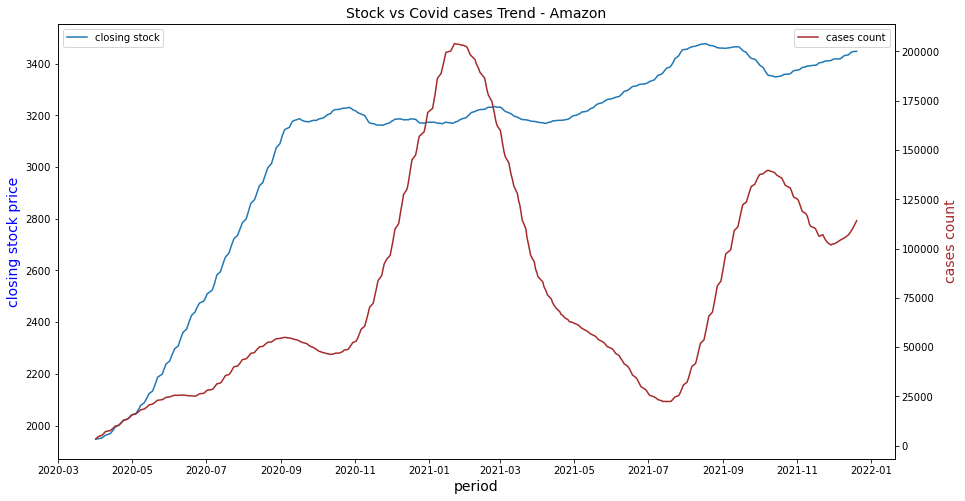

In [227]:
#combined visualization - Stock vs Covid cases Trend - Amazon
fig,ax = plt.subplots(figsize=(15,8))
ax.set_title('Stock vs Covid cases Trend - Amazon',fontsize=14)
ax.plot(amazon_combined['close'].rolling(50).mean(),label="closing stock")
ax.set_xlabel("period",fontsize=14)
ax.set_ylabel("closing stock price",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(amazon_combined['cases_count'].rolling(50).mean(),color="brown",label="cases count")
ax2.set_ylabel("cases count",color="brown",fontsize=14)
ax.legend(loc='upper left')
ax2.legend()
plt.show()

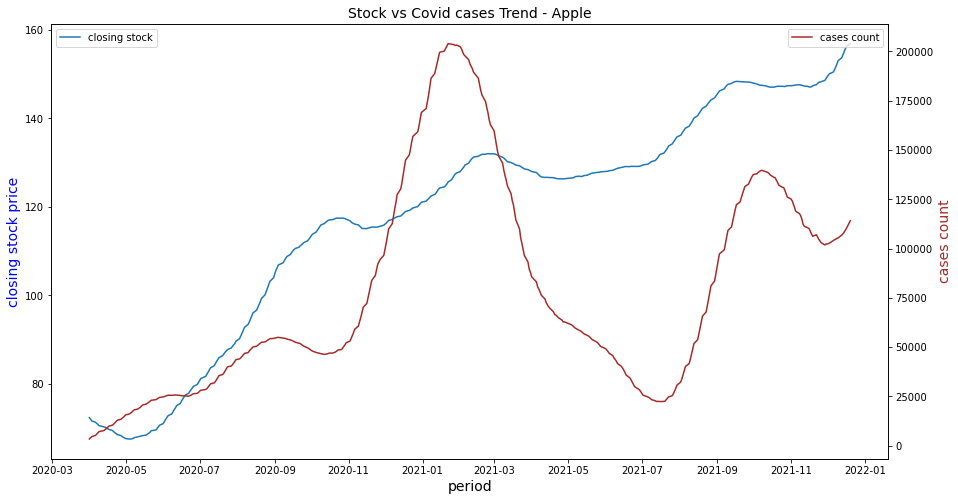

In [224]:
#combined visualization - Stock vs Covid cases Trend - Apple
fig,ax = plt.subplots(figsize=(15,8))
ax.set_title('Stock vs Covid cases Trend - Apple',fontsize=14)
ax.plot(apple_combined['close'].rolling(50).mean(),label="closing stock")
ax.set_xlabel("period",fontsize=14)
ax.set_ylabel("closing stock price",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(apple_combined['cases_count'].rolling(50).mean(),color="brown",label="cases count")
ax2.set_ylabel("cases count",color="brown",fontsize=14)
ax.legend(loc='upper left')
ax2.legend()
plt.show()

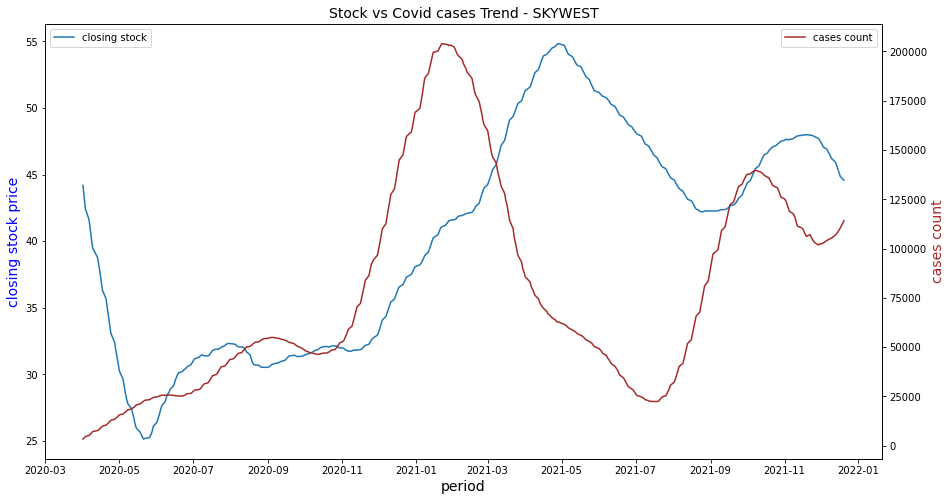

In [225]:
#combined visualization - Stock vs Covid cases Trend - Skywest
fig,ax = plt.subplots(figsize=(15,8))
ax.set_title('Stock vs Covid cases Trend - SKYWEST',fontsize=14)
ax.plot(skywest_combined['close'].rolling(50).mean(),label="closing stock")
ax.set_xlabel("period",fontsize=14)
ax.set_ylabel("closing stock price",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(skywest_combined['cases_count'].rolling(50).mean(),color="brown",label="cases count")
ax2.set_ylabel("cases count",color="brown",fontsize=14)
ax.legend(loc='upper left')
ax2.legend()
plt.show()

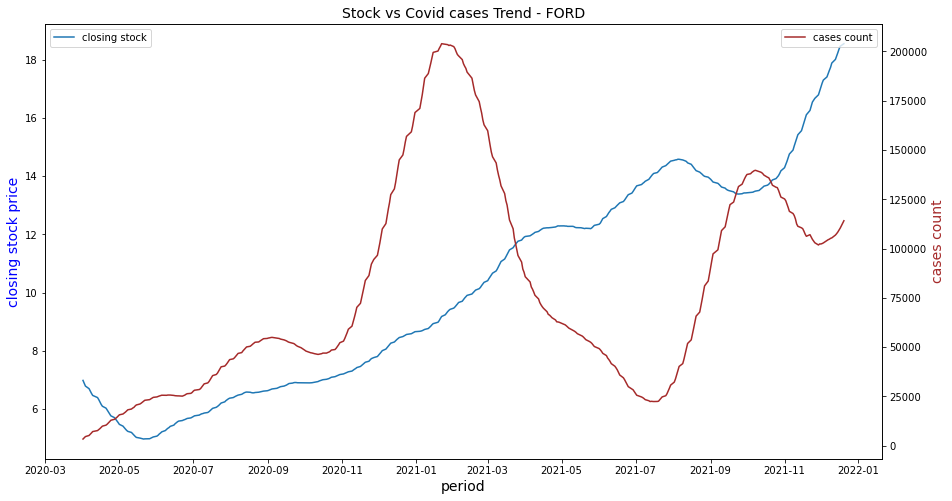

In [226]:
#combined visualization - Stock vs Covid cases Trend - Ford
fig,ax = plt.subplots(figsize=(15,8))
ax.set_title('Stock vs Covid cases Trend - FORD',fontsize=14)
ax.plot(ford_combined['close'].rolling(50).mean(),label="closing stock")
ax.set_xlabel("period",fontsize=14)
ax.set_ylabel("closing stock price",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(ford_combined['cases_count'].rolling(50).mean(),color="brown",label="cases count")
ax2.set_ylabel("cases count",color="brown",fontsize=14)
ax.legend(loc='upper left')
ax2.legend()
plt.show()